<a href="https://colab.research.google.com/github/BCIPRO/Test/blob/main/WensenTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Mounting google drive to google colab notebook
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# Library imports
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

# Keras imports
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Importing MNIST Dataset
filepath = "/content/gdrive/MyDrive/Colab Notebooks/Datasets/MNIST/MW.txt"
f = open(filepath, 'r')
lines = f.readlines()

## Seperates into tags, data, and classifier

tags = [] # each row has structure [id, event, device, channel, code, size]
data = [] # each row is 2 seconds of data
classifier = [] # corresponding number associated with the 2 second data. Equivalent of the 'code' tag
datasize = [] # corresponding length of the data vector for each reading

for line in lines:
  split = line.split()
  tags.append(split[0:6])
  inter = split[6].split(",")
  data.append([int(nstring) for nstring in inter])
  classifier.append(int(split[4]))
  datasize.append(len(inter))

f.close()

Tags:  ['0', '0', 'MW', 'FP1', '0', '1017']
Classifier:  0
Datasize:  953
Max Datasize:  1024
Min Datasize:  441
[441 504 569 700 763 825 826 888 889]
[   1    1    1    1    2    7    5  530 6445]
[ 890  951  952  953 1014 1015 1016 1017 1024]
[    1  1068 14403 13610   597  8617   820  8825 12701]


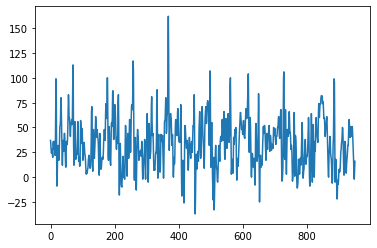

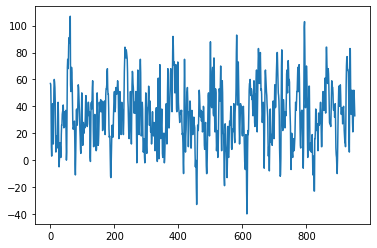

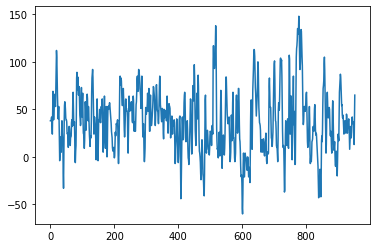

In [20]:
# Data visualization
print("Tags: ", tags[0])
# print("Data: ", data[0])
print("Classifier: ", classifier[0])
print("Datasize: ", datasize[100])
print("Max Datasize: ", max(datasize))
print("Min Datasize: ", min(datasize))

# Unique Elements
unique, unique_counts = np.unique(datasize, return_counts=True)
print(unique[0:int(len(unique)/2)])
print(unique_counts[0:int(len(unique)/2)])
print(unique[int(len(unique)/2):])
print(unique_counts[int(len(unique)/2):])

# Searching for all occurrences of a single classifier
searchval = 0
occurrences = np.where(np.array(classifier) == searchval)[0]

# Plotting figures
plt.figure(1)
plt.plot(data[occurrences[300]])

plt.figure(2)
plt.plot(data[occurrences[200]])

plt.figure(3)
plt.plot(data[occurrences[100]])

plt.show()

plt.close() # closes all active plots

In [21]:
# Fourier Transform
dft = []
dft_real = []
dft_imag = []
dft_freq = []
dft_magn = []
for i in range(len(data)):
  fft = np.fft.fft(data[i])
  freq = np.fft.fftfreq(fft.shape[-1])
  dft.append(fft)
  dft_real.append(fft.real)
  dft_imag.append(fft.imag)
  dft_freq.append(freq)

for i in range(len(dft)):
  dft_magn.append(np.abs(dft[i]))

# Padding
padded_data = pad_sequences(data, padding='post')
padded_dft = pad_sequences(dft, padding='post')
padded_dft_real = pad_sequences(dft_real, padding='post')
padded_dft_imag = pad_sequences(dft_imag, padding='post')
padded_dft_freq = pad_sequences(dft_freq, padding='post')
padded_dft_magn = pad_sequences(dft_magn, padding='post')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


3


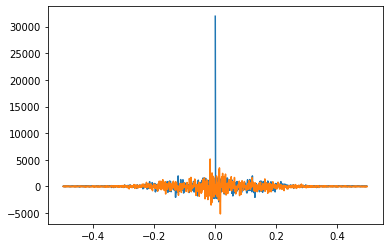

In [22]:
# Plotting Transform
index = 2000
print(classifier[index])
plt.figure(1)
plt.plot(dft_freq[index], dft[index].real, dft_freq[index], dft[index].imag)
plt.show()
plt.close()

In [23]:
# Generating Tensorflow Datasets (Not used right now)
dataset_dft = tf.data.Dataset.from_tensor_slices((np.array(padded_dft), np.array(classifier)))
dataset_data = tf.data.Dataset.from_tensor_slices((np.array(padded_data), np.array(classifier)))
dataset_dft_real = tf.data.Dataset.from_tensor_slices((np.array(padded_dft_real), np.array(classifier)))
dataset_dft_imag = tf.data.Dataset.from_tensor_slices((np.array(padded_dft_imag), np.array(classifier)))
dataset_dft_freq = tf.data.Dataset.from_tensor_slices((np.array(padded_dft_freq), np.array(classifier)))
dataset_dft_magn = tf.data.Dataset.from_tensor_slices((np.array(padded_dft_magn), np.array(classifier)))

it = iter(dataset_dft)
print(next(it))

(<tf.Tensor: shape=(1024,), dtype=int32, numpy=array([39711, 13689,  -370, ...,     0,     0,     0], dtype=int32)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [24]:
# Model Definition
model = Sequential();
model.add(Dense(1024, input_dim=len(padded_data[0]), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(padded_dft_magn, np.array(classifier), epochs=150, batch_size=1000)

Epoch 1/150
68/68 [==============================] - 1s 7ms/step - loss: -156936761.7573 - accuracy: 0.0810
Epoch 2/150
68/68 [==============================] - 0s 6ms/step - loss: -19494777514.6667 - accuracy: 0.0822
Epoch 3/150
68/68 [==============================] - 0s 6ms/step - loss: -286296432046.3768 - accuracy: 0.0810
Epoch 4/150
68/68 [==============================] - 0s 6ms/step - loss: -1608125305722.4348 - accuracy: 0.0809
Epoch 5/150
68/68 [==============================] - 0s 6ms/step - loss: -5533064354534.0293 - accuracy: 0.0807
Epoch 6/150
68/68 [==============================] - 0s 6ms/step - loss: -14245669964577.3906 - accuracy: 0.0805
Epoch 7/150
68/68 [==============================] - 0s 6ms/step - loss: -30491307504387.7109 - accuracy: 0.0809
Epoch 8/150
68/68 [==============================] - 0s 6ms/step - loss: -57898385048976.6953 - accuracy: 0.0820
Epoch 9/150
68/68 [==============================] - 0s 6ms/step - loss: -99054879498833.6250 - accuracy: 0.

KeyboardInterrupt: ignored